In [ ]:
# =================  Chronic Kidney Disease Prediction ==========
# Classification Assignment
# Ref URL: https://www.kaggle.com/code/parash11/kidney-disease-prediction-accuracy-98-6-3
# https://www.kaggle.com/code/hasantugra/kidney-disease-classification # This is not used in this file

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [39]:
import warnings
plt.style.use('fivethirtyeight')
%matplotlib inline



In [15]:
df = pd.read_csv("CKD.csv")

In [16]:
df.shape

(399, 25)

In [17]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.0,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.0,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.0,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.0,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.0,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes


In [18]:
# rename columns to make it more user-friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cell',
              'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine',
              'sodium', 'potassium', 'haemoglobin', 'packed_cell_volumn', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']

In [19]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cell,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volumn,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,2.0,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.0,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.0,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.0,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.0,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes


In [20]:
df.describe()

,age,blood_pressure,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volumn,white_blood_cell_count,red_blood_cell_count
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,51.492308,76.459948,0.899749,0.395990,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597
std,16.995379,13.492053,1.314769,1.041155,74.864224,49.336046,5.623758,9.215829,2.823323,2.715753,8.157274,2526.204544,0.841006
min,2.000000,50.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.850000,34.000000,6950.000000,4.500000
50%,54.000000,76.459948,0.000000,0.000000,127.000000,44.000000,1.400000,137.528754,4.627244,12.518156,38.868902,8408.191126,4.705597
75%,64.000000,80.000000,2.000000,0.000000,150.000000,62.500000,3.077356,141.000000,4.800000,14.600000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      399 non-null    float64
 1   blood_pressure           399 non-null    float64
 2   specific_gravity         399 non-null    object 
 3   albumin                  399 non-null    float64
 4   sugar                    399 non-null    float64
 5   red_blood_cell           399 non-null    object 
 6   pus_cell                 399 non-null    object 
 7   pus_cell_clumps          399 non-null    object 
 8   bacteria                 399 non-null    object 
 9   blood_glucose_random     399 non-null    float64
 10  blood_urea               399 non-null    float64
 11  serum_creatinine         399 non-null    float64
 12  sodium                   399 non-null    float64
 13  potassium                399 non-null    float64
 14  haemoglobin              3

In [25]:
# converting necessary columns to numerical type
'''

df['packed_cell_volumn'] = pd.to_numeric(df['packed_cell_volumn'], errors='coerce')
df['white_blood_cell_count']   = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']     = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

'''


"\n\ndf['packed_cell_volumn'] = pd.to_numeric(df['packed_cell_volumn'], errors='coerce')\ndf['white_blood_cell_count']   = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')\ndf['red_blood_cell_count']     = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')\n\n"

In [27]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype == 'float64']

In [28]:
cat_cols

['specific_gravity',
 'red_blood_cell',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [46]:
df.specific_gravity.value_counts()
df.diabetes_mellitus.value_counts()
df.coronary_artery_disease.value_counts()
df['class'].value_counts()



class
yes    249
no     150
Name: count, dtype: int64

In [34]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

specific_gravity has ['c' 'a' 'd' 'b' 'e'] values 

red_blood_cell has ['normal' 'abnormal'] values 

pus_cell has ['abnormal' 'normal'] values 

pus_cell_clumps has ['notpresent' 'present'] values 

bacteria has ['notpresent' 'present'] values 

hypertension has ['no' 'yes'] values 

diabetes_mellitus has ['no' 'yes'] values 

coronary_artery_disease has ['no' 'yes'] values 

appetite has ['yes' 'poor'] values 

peda_edema has ['yes' 'poor'] values 

aanemia has ['no' 'yes'] values 

class has ['yes' 'no'] values 



C:\Users\Admin\AppData\Local\Temp\ipykernel_29008\733200234.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_29008\733200234.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2900

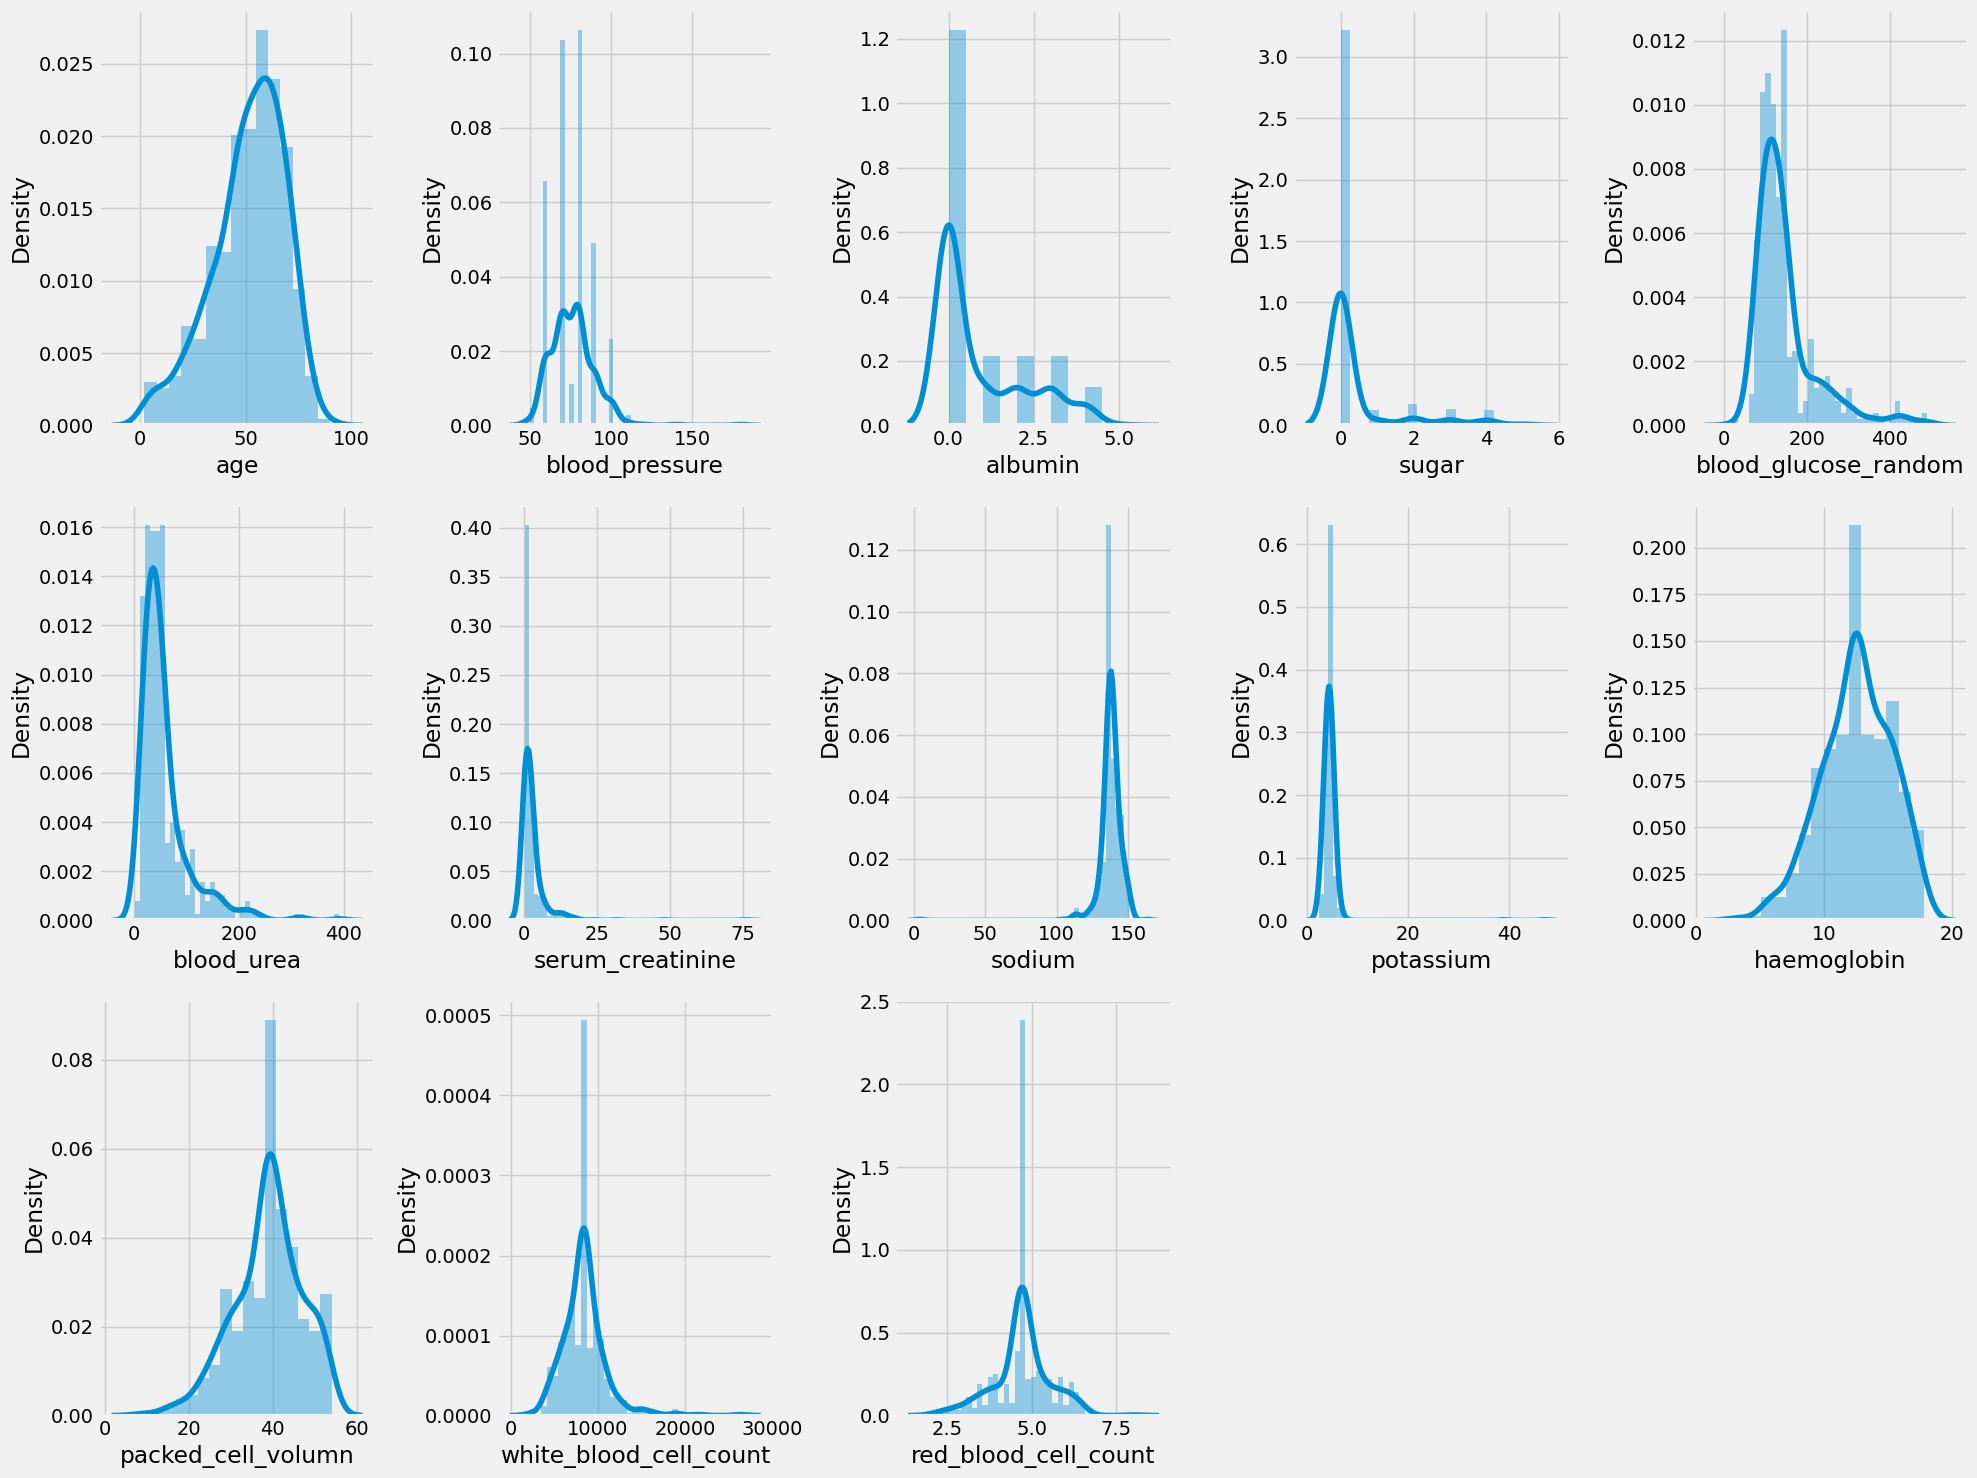

In [42]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
# replace incorrect values
''' df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
df['coronary_artery_disease'] =  df['coronary_artery_disease'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
df['class'] = df['class'].replace(to_replace={'yes\t': 'yes', 'no\t': 'no'})

'''

C:\Users\Admin\AppData\Local\Temp\ipykernel_29008\4082031622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='rocket')
C:\Users\Admin\AppData\Local\Temp\ipykernel_29008\4082031622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='rocket')
C:\Users\Admin\AppData\Local\Temp\ipykernel_29008\4082031622.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='rocket')
C:\Users\Admin\AppData\Local\Temp\ipykernel_29008\4082031622.py:9: FutureWarning: 

Passing `palette` with

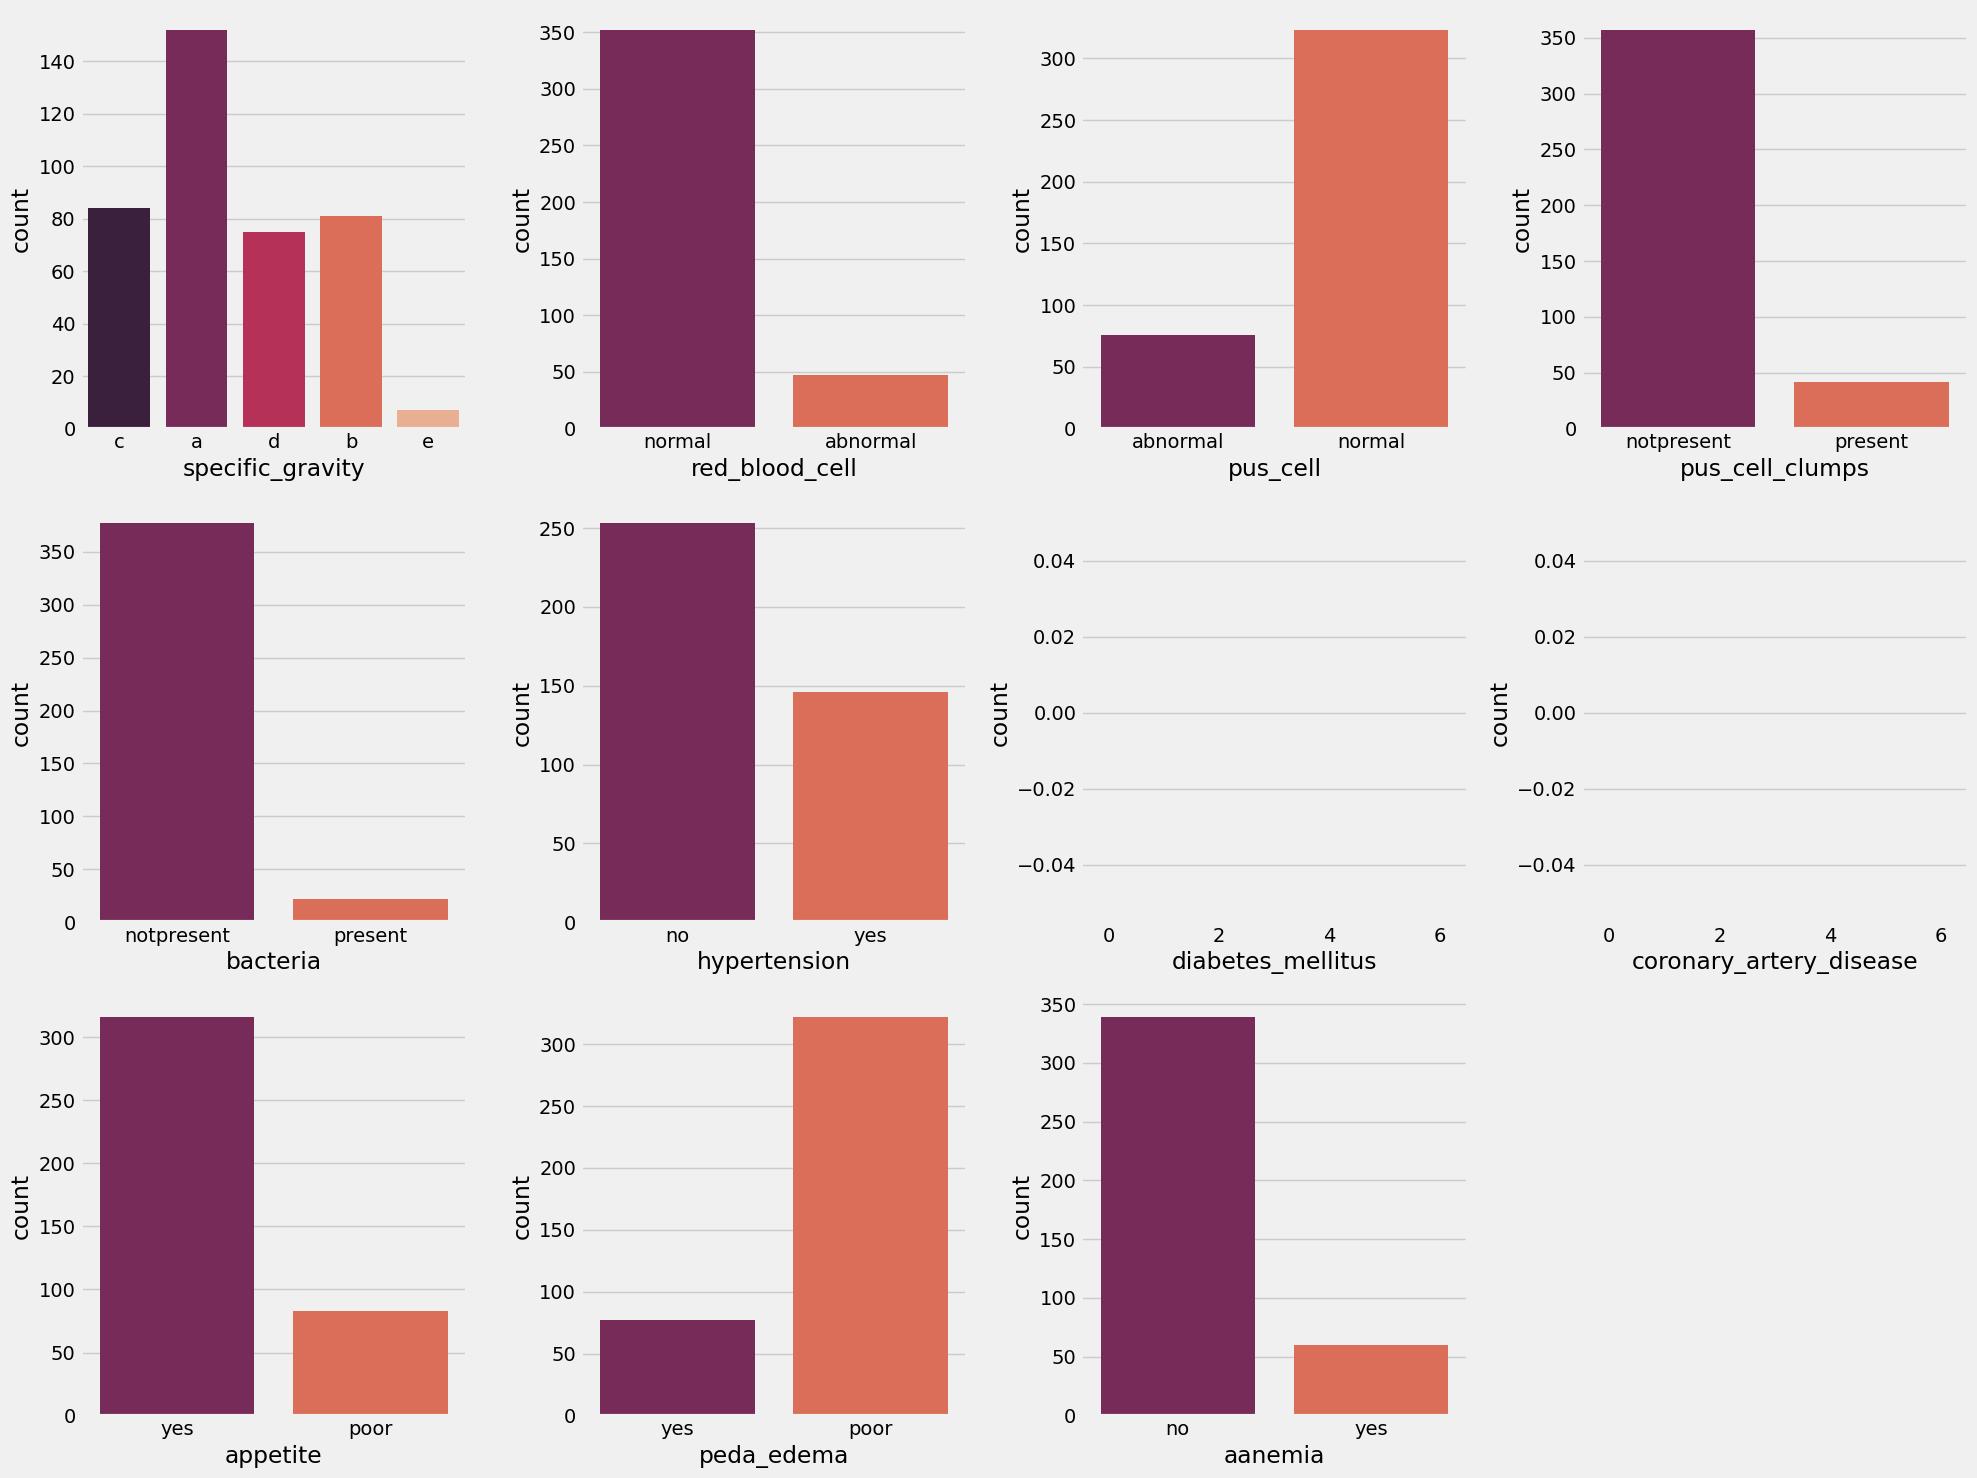

In [48]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=df[column], palette='rocket')
        plt.xlabel(column)
    
    plotnumber += 1

plt.tight_layout()
plt.show()    

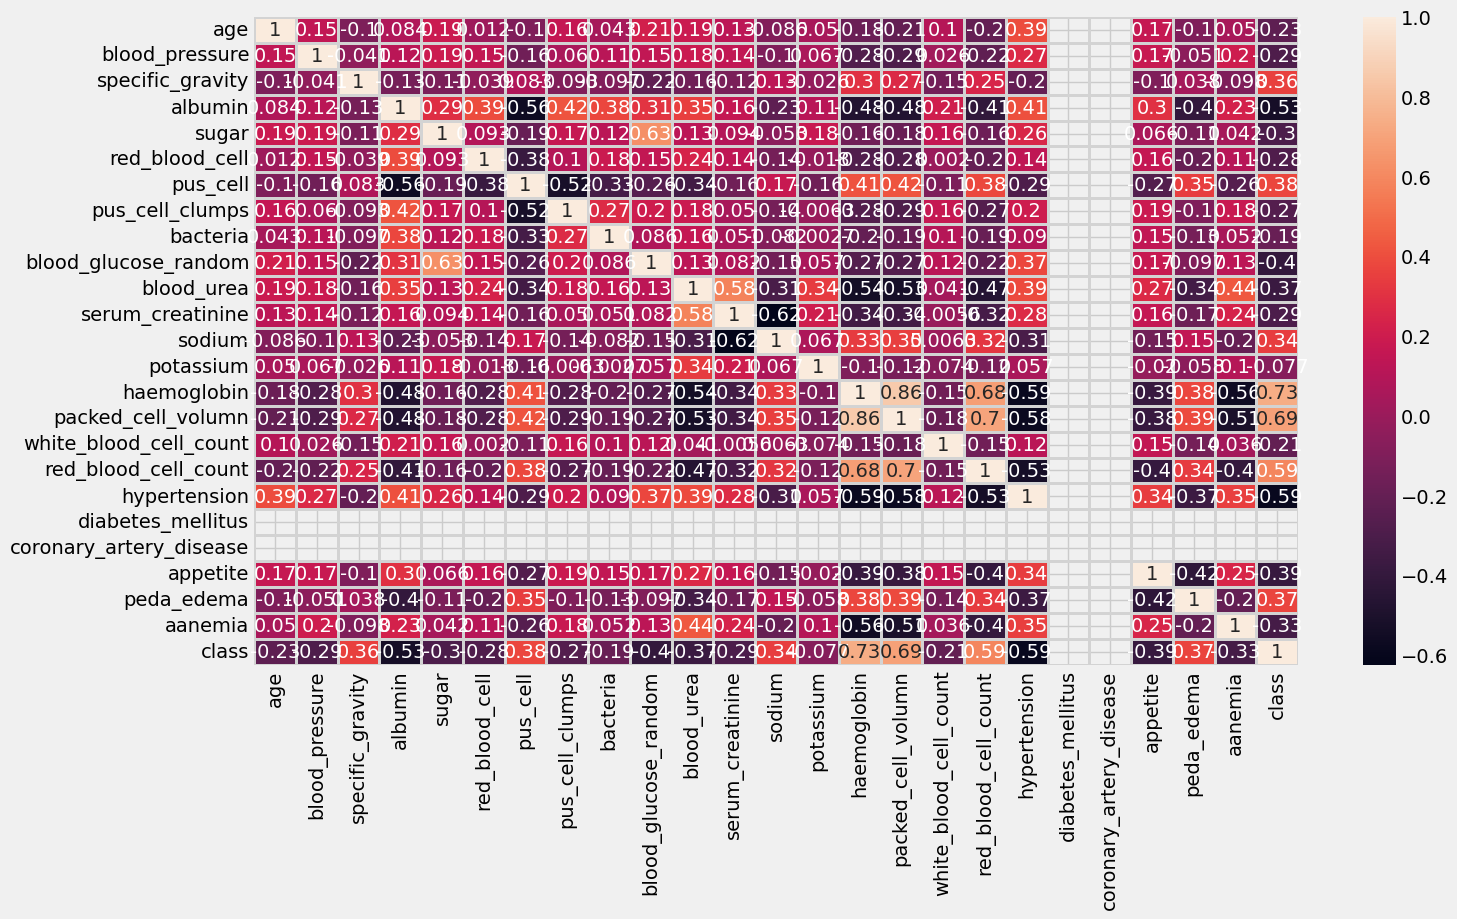

In [49]:
# heatmap of data

plt.figure(figsize = (15, 8))

# Convert categorical columns to numerical using pd.factorize before calculating correlation
numeric_df = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)


sns.heatmap(numeric_df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()


In [50]:
# checking for null values

df.isna().sum().sort_values(ascending = False)


coronary_artery_disease    399
diabetes_mellitus          399
age                          0
potassium                    0
aanemia                      0
peda_edema                   0
appetite                     0
hypertension                 0
red_blood_cell_count         0
white_blood_cell_count       0
packed_cell_volumn           0
haemoglobin                  0
sodium                       0
blood_pressure               0
serum_creatinine             0
blood_urea                   0
blood_glucose_random         0
bacteria                     0
pus_cell_clumps              0
pus_cell                     0
red_blood_cell               0
sugar                        0
albumin                      0
specific_gravity             0
class                        0
dtype: int64

In [55]:
df['class'].value_counts()

class
yes    249
no     150
Name: count, dtype: int64